## 1. Loading and Displaying Well Data From CSV

Created By: Andy McDonald

The following tutorial illustrates loading basic well log data from a csv file by using pandas, and displaying the data using the plotting option available in pandas. 

In [1]:
# Data manipulation
import pandas as pd

# Maths/Basic statistic's
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Pandas DataFrame from csv file
well = pd.read_csv("Data/L0509WellData.csv", header=0)

To check that the data has been loaded in correctly, we can use the .head() function in pandas to view the first 5 rows and the header.

In [3]:
# Print first 5 rows
well.head()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,4609.8008,89.059479,-999.000000,2.483700,0.018494,0.129119
1,4609.9008,90.721848,-999.000000,2.489308,0.013656,0.108034
2,4610.0008,90.709061,-999.000000,2.501088,0.011289,0.085650
3,4610.1008,89.568954,66.223099,2.515450,0.008615,0.070332
4,4610.2008,88.169571,66.705551,2.530982,0.005628,0.065343


In [4]:
# General pandas DataFrame information
well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   1921 non-null   float64
 1   GR      1921 non-null   float64
 2   DT      1921 non-null   float64
 3   RHOB    1921 non-null   float64
 4   DRHO    1921 non-null   float64
 5   NPHI    1921 non-null   float64
dtypes: float64(6)
memory usage: 90.2 KB


We can also view some statistics on the curves by using the describe() function.

In [5]:
# Statistic's summary
well.describe().transpose().round(4)

,count,mean,std,min,25%,50%,75%,max
DEPTH,1921.0,4705.8004,55.4687,4609.8008,4657.8006,4705.8004,4753.8002,4801.8000
GR,1921.0,67.5438,31.4558,19.6059,38.9028,63.4877,95.9230,137.4629
DT,1921.0,65.7328,42.3622,-999.0000,64.2833,67.3774,70.0743,89.6209
RHOB,1921.0,2.5541,0.1214,1.9471,2.4951,2.5578,2.6471,2.7888
DRHO,1921.0,0.0205,0.0454,-0.1320,-0.0127,0.0069,0.0549,0.1341
NPHI,1921.0,0.1141,0.0393,0.0335,0.0922,0.1112,0.1289,0.4174


Before carrying out any displaying of data or calculations, we carry out some data cleansing. The first is the conversion of null values, represented by -999.25, to a Not a Number (NaN). We can achieve this using the replace function.

In [6]:
# Handling special values of this specific dataframe
well.replace(-999, np.nan, inplace=True)

If we now call the describe and head functions on the well dataframe, we can see that the nulls have been been replaced.

In [7]:
well.describe().transpose().round(4)

,count,mean,std,min,25%,50%,75%,max
DEPTH,1921.0,4705.8004,55.4687,4609.8008,4657.8006,4705.8004,4753.8002,4801.8000
GR,1921.0,67.5438,31.4558,19.6059,38.9028,63.4877,95.9230,137.4629
DT,1918.0,67.3982,4.5254,54.9295,64.3246,67.3927,70.0781,89.6209
RHOB,1921.0,2.5541,0.1214,1.9471,2.4951,2.5578,2.6471,2.7888
DRHO,1921.0,0.0205,0.0454,-0.1320,-0.0127,0.0069,0.0549,0.1341
NPHI,1921.0,0.1141,0.0393,0.0335,0.0922,0.1112,0.1289,0.4174


In [8]:
well.head()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,4609.8008,89.059479,NaN,2.483700,0.018494,0.129119
1,4609.9008,90.721848,NaN,2.489308,0.013656,0.108034
2,4610.0008,90.709061,NaN,2.501088,0.011289,0.085650
3,4610.1008,89.568954,66.223099,2.515450,0.008615,0.070332
4,4610.2008,88.169571,66.705551,2.530982,0.005628,0.065343


By default, the well.head() function produces the first 5 rows of data. We can extend this by passing in a value to the head function.

In [9]:
well.head(20)

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,4609.8008,89.059479,NaN,2.483700,0.018494,0.129119
1,4609.9008,90.721848,NaN,2.489308,0.013656,0.108034
2,4610.0008,90.709061,NaN,2.501088,0.011289,0.085650
3,4610.1008,89.568954,66.223099,2.515450,0.008615,0.070332
4,4610.2008,88.169571,66.705551,2.530982,0.005628,0.065343
5,4610.3008,86.943130,67.237823,2.543377,0.001724,0.066881
6,4610.4008,86.172943,67.531052,2.550319,-0.002829,0.067540
7,4610.5008,86.267899,68.183243,2.555398,-0.006574,0.065946
8,4610.6008,87.750702,68.546539,2.564067,-0.008947,0.063870
9,4610.7008,90.922546,68.219681,2.578216,-0.010293,0.063689


Now we have some data appearing in the GR column.

### Viewing Data on a Log Plot

With pandas, we can quickly bring up a plot of our well data by using the .plot() function on our well dataframe. <br><br>If we just specify the x and y axis, we can generate a simple line plot.

<AxesSubplot:xlabel='Depth (fts)', ylabel='Gamma Ray'>

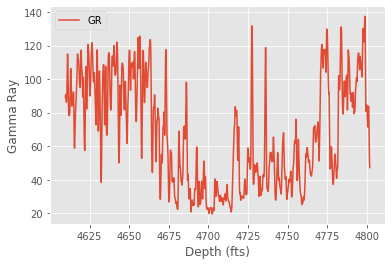

In [10]:
# style
plt.style.use('ggplot')

well.plot(x='DEPTH', y='GR', xlabel='Depth (fts)', ylabel=('Gamma Ray'))

We can change the type of plot by using the keyword kind and passing in the word scatter. In this example we have a familiar density neutron crossplot. <b>Note</b> that we can change the y-axis scales so that they are flipped and show increasing porosity as you move up the axis.

<AxesSubplot:xlabel='NPHI', ylabel='RHOB'>

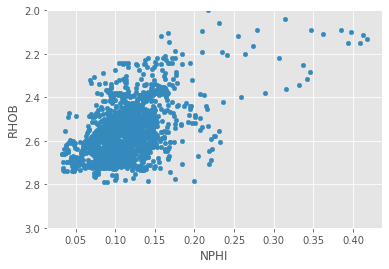

In [11]:
# Basic pandas scatterplot
well.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', ylim=(3, 2))

Pearson Correlation between NPHI and RHOB:       NPHI  RHOB
NPHI  1.00 -0.53
RHOB -0.53  1.00


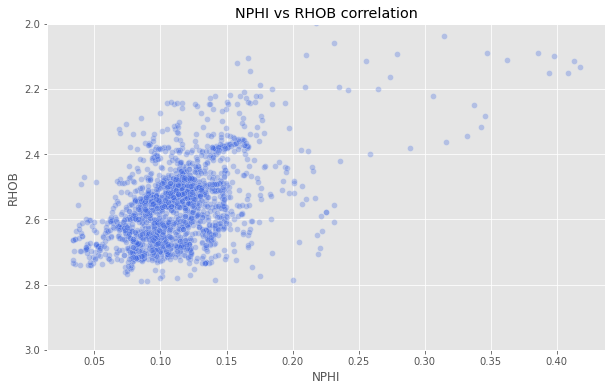

In [12]:
# Scatterplot with seaborn, and matplotlib.pyplot

corr = well[['NPHI', 'RHOB']].corr().round(2)

print("Pearson Correlation between NPHI and RHOB: {}".format(corr))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=well, x='NPHI', y='RHOB', alpha=0.3, color='royalblue')

plt.title('NPHI vs RHOB correlation')

plt.ylim(3, 2)

plt.show()

We can also add some colour to our plot using the gamma ray as a third axis. This is done by including the c argument and specifying the column name. <br><br>
This helps us identify the cleaner intervals from shalier intervals

<AxesSubplot:xlabel='NPHI', ylabel='RHOB'>

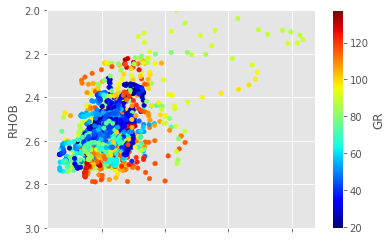

In [13]:
well.plot(kind='scatter',x='NPHI',y='RHOB',c='GR', 
          colormap='jet', 
          ylim=(3, 2))

Pearson Correlation between NPHI and RHOB:       NPHI  RHOB
NPHI  1.00 -0.53
RHOB -0.53  1.00


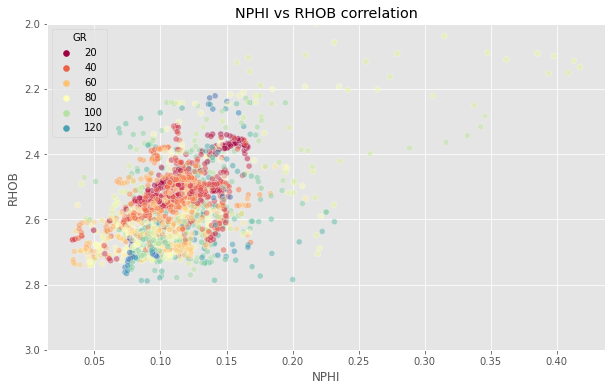

In [14]:
# Scatterplot with seaborn, and matplotlib.pyplot

corr = well[['NPHI', 'RHOB']].corr().round(2)

print("Pearson Correlation between NPHI and RHOB: {}".format(corr))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=well, x='NPHI', y='RHOB', alpha=0.5, palette='Spectral', hue='GR')

plt.title('NPHI vs RHOB correlation')

plt.ylim(3, 2)

plt.show()

Data can also be easily displayed as a histogram in the form of bars:

<AxesSubplot:ylabel='Frequency'>

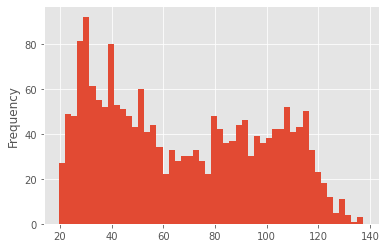

In [15]:
# Basic pandas histogram
well['GR'].plot(kind="hist", bins = 50)

Or using a Kernel Density Estimate:

<AxesSubplot:ylabel='Density'>

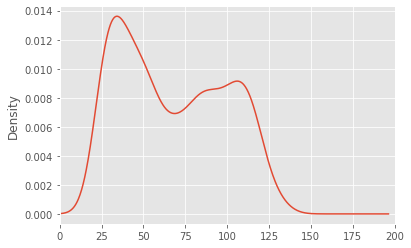

In [16]:
# Basic kernel density estimate shape plot
well['GR'].plot(kind="kde", xlim =(0,200))

That is all for this short tutorial. In the next one we will take our plotting to the next level and construct the familiar log plot using matplotlib.